# Maps and Visualizations

> This page is where we began coding for and playing around with the map functions in the tool.

In [2]:
#Import libraries
import geopandas
import pandas as pd
import descartes
from descartes.patch import PolygonPatch
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, DBSCAN
from ipyleaflet import Map,Marker,CircleMarker,Heatmap
from random import uniform

/Users/mdevlin/anaconda3/lib/python3.7/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


> At first, we wanted to use kmeans or dsbscan to cluster our lifelines so that we could estimate areas where FEMA was lacking in lifelines, with more time, we would have liked to work these onto a map.

## Plot hospitals using lat/long

In [4]:
#Read in hospitals csv file
df = pd.read_csv('./datasets/Individual Life-lines/hospitals.csv')
df1=pd.read_csv('./datasets/Individual Life-lines/morehosp.csv')

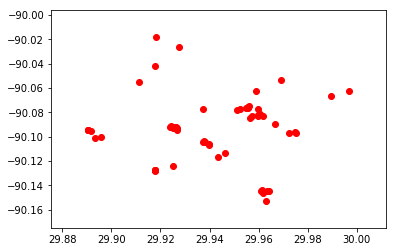

In [5]:
plt.scatter(df['lat'],df['lng'],c='red')


## Using KMeans clustering group hospitals near each other.

In [8]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=7, random_state=42)
km.fit(df[['lat','lng']])


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [9]:
set(km.labels_)


{0, 1, 2, 3, 4, 5, 6}

In [10]:
df['kmcluster'] = km.labels_


In [11]:
km.cluster_centers_


array([[ 29.96030205, -90.08167278],
       [ 29.9232875 , -90.12541128],
       [ 29.93159618, -90.09689034],
       [ 29.96236273, -90.14611722],
       [ 29.91865128, -90.03545122],
       [ 29.89212652, -90.09665297],
       [ 29.98513793, -90.06081777]])

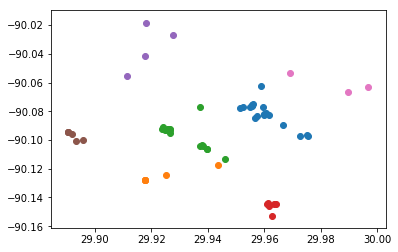

In [13]:
ax1 = plt.scatter(df[df["kmcluster"] == 0]["lat"], df[df["kmcluster"] == 0]["lng"])
ax2 = plt.scatter(df[df["kmcluster"] == 1]["lat"], df[df["kmcluster"] == 1]["lng"])
ax3 = plt.scatter(df[df["kmcluster"] == 2]["lat"], df[df["kmcluster"] == 2]["lng"])
ax3 = plt.scatter(df[df["kmcluster"] == 3]["lat"], df[df["kmcluster"] == 3]["lng"])
ax3 = plt.scatter(df[df["kmcluster"] == 4]["lat"], df[df["kmcluster"] == 4]["lng"])
ax3 = plt.scatter(df[df["kmcluster"] == 5]["lat"], df[df["kmcluster"] == 5]["lng"])
ax3 = plt.scatter(df[df["kmcluster"] == 6]["lat"], df[df["kmcluster"] == 6]["lng"])

ipyleaflet

In [14]:

m=Map(center =[29.917749,-90.128072],zoom=12)
for i in range(len(df[['lat','lng']])):
    marker = Marker(location=[df['lat'][i], df['lng'][i]], draggable=False)
    m.add_layer(marker);

circle_marker = CircleMarker()
circle_marker.location = (29.917749,-90.128072)
circle_marker.radius = 75
circle_marker.color = "red"
circle_marker.fill_color = "red"
m.add_layer(circle_marker)    

circle_marker = CircleMarker()
circle_marker.location = (29.917749,-90.128072)
circle_marker.radius = 100
circle_marker.color = "yellow"
circle_marker.fill_color = "yellow" 
m.add_layer(circle_marker)
m


Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map …

In [15]:
destruction_map('29.9511,-90.0715',75)

NameError: name 'destruction_map' is not defined

In [16]:
dff= pd.concat([df,df1],ignore_index=True)

/Users/mdevlin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [17]:
dff.drop_duplicates(inplace=True)

In [18]:
dff

,geometry,kmcluster,lat,lng,name,types,vicinity
0,"{'location': {'lat': 29.9177486, 'lng': -90.12...",1.0,29.917749,-90.128072,Children's Hospital New Orleans,"['hospital', 'point_of_interest', 'establishme...","200 Henry Clay Avenue, New Orleans"
1,"{'location': {'lat': 29.8917868, 'lng': -90.09...",5.0,29.891787,-90.095509,West Jefferson Medical Center,"['hospital', 'point_of_interest', 'establishme...","1101 Medical Center Boulevard, Marrero"
2,"{'location': {'lat': 29.9556817, 'lng': -90.07...",0.0,29.955682,-90.075830,Tulane Medical Center,"['hospital', 'point_of_interest', 'establishme...","1415 Tulane Avenue, New Orleans"
3,"{'location': {'lat': 29.9266229, 'lng': -90.09...",2.0,29.926623,-90.092867,Internal Medicine Specialist Inc.,"['hospital', 'health', 'point_of_interest', 'e...","3525 Prytania Street, New Orleans"
4,"{'location': {'lat': 29.9177892, 'lng': -90.12...",1.0,29.917789,-90.127685,CHNOLA,"['hospital', 'point_of_interest', 'establishme...","5720, 200 Henry Clay Avenue, New Orleans"
5,"{'location': {'lat': 29.9395701, 'lng': -90.10...",2.0,29.939570,-90.106612,Planned Parenthood - New Orleans Health Center,"['hospital', 'point_of_interest', 'establishme...","4636 South Claiborne Avenue Ste 100, New Orleans"
6,"{'location': {'lat': 29.9372464, 'lng': -90.10...",2.0,29.937246,-90.104245,Ochsner Baptist,"['hospital', 'point_of_interest', 'establishme...","2700 Napoleon Avenue, New Orleans"
7,"{'location': {'lat': 29.8906192, 'lng': -90.09...",5.0,29.890619,-90.094537,Heart Clinic Louisiana,"['hospital', 'point_of_interest', 'establishme...","1111 Medical Center Boulevard, Marrero"
8,"{'location': {'lat': 29.9372263, 'lng': -90.07...",2.0,29.937226,-90.077196,Center for Restorative Breast Surgery,"['doctor', 'hospital', 'health', 'point_of_int...","1717 Saint Charles Avenue, New Orleans"
9,"{'location': {'lat': 29.924955, 'lng': -90.093...",2.0,29.924955,-90.093254,Curahealth New Orleans,"['hospital', 'point_of_interest', 'establishme...","3601 Coliseum Street, New Orleans"


In [19]:
final_df=pd.read_csv('./datasets/full_dataset.csv')

In [20]:
def destruction_map(df_latlong,event_lat,event_long, event_radius):
    m=Map(center =[event_lat,event_long],zoom=13)
    for i in range(len(df_latlong)):
        marker = Marker(location=[df_latlong['lat'][i], df_latlong['lng'][i]], draggable=False, zoom_control=False)
        m.add_layer(marker);

    circle_marker = CircleMarker()
    circle_marker.location = (event_lat,event_long)
    circle_marker.radius = event_radius
    circle_marker.color = "red"
    circle_marker.fill_color = "red"
    m.add_layer(circle_marker)    

    circle_marker = CircleMarker()
    circle_marker.location = (event_lat,event_long)
    circle_marker.radius = int(event_radius*1.25)
    circle_marker.color = "yellow"
    circle_marker.fill_color = "yellow" 
    m.add_layer(circle_marker)
    return m


In [21]:
destruction_map(final_df[['lat','lng']],30.003654,-90.172059, 50)

Map(basemap={'url': 'https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png', 'max_zoom': 19, 'attribution': 'Map …